In [ ]:
"""
Bokeh交互可视化
当绘制的蜡烛图比较多,可能有横向平移,放大等交互需求时,可以通过网页的形式进行可视化
"""


In [1]:
"""
pandas封装了matplotlib;使用matplotlib可以实现的都可以用pandas更好实现
"""
# 绘制股票收益和收益波动
import pandas as pd
import numpy as np
import baostock as bs
#### 登陆系统 ####
lg = bs.login()
# 显示登陆返回信息
print('login respond error_code:' + lg.error_code)
print('login respond  error_msg:' + lg.error_msg)
# 获取茅台的收盘价
maotai = bs.query_history_k_data_plus("sh.600519","date,code,open,high,low,close,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM", start_date='2018-01-01', end_date='2021-12-31',frequency="d", adjustflag="3")
data_list = []
while (maotai.error_code == '0') & maotai.next():
    # 获取一条记录，将记录合并在一起
    data_list.append(maotai.get_row_data())
mt = pd.DataFrame(data_list, columns=maotai.fields)
print(mt.head(5))

login success!
login respond error_code:0
login respond  error_msg:success
         date       code      open      high       low     close  preclose  \
0  2018-01-02  sh.600519  700.0000  710.1600  689.8900  703.8500  697.4900   
1  2018-01-03  sh.600519  701.5000  721.4000  699.7400  715.8600  703.8500   
2  2018-01-04  sh.600519  721.4000  743.5000  719.3300  737.0700  715.8600   
3  2018-01-05  sh.600519  741.0000  746.0300  728.2200  738.3600  737.0700   
4  2018-01-08  sh.600519  735.0200  756.5000  735.0200  752.1300  738.3600   

    volume           amount      turn    pctChg      peTTM      pbMRQ  \
0  4961248  3482407646.0000  0.394942  0.911839  36.480928  10.481447   
1  5201941  3713523701.0000  0.414102  1.706331  37.103413  10.660295   
2  7220508  5309890210.0000  0.574791  2.962873  38.202738  10.976145   
3  3998907  2946493013.0000  0.318334  0.175014  38.269600  10.995356   
4  5220456  3899951720.0000  0.415576  1.864947  38.983306  11.200413   

       psTTM  pcf

In [2]:
mt['date'] = pd.to_datetime(mt['date'], format = '%Y-%m-%d')
mt['code'] = mt['code'].astype('string')
for each in ['open', 'high', 'low', 'close', 'preclose', 'volume', 'amount', 'turn', 'pctChg', 'peTTM', 'pbMRQ', 'psTTM', 'pcfNcfTTM']:
    mt[each] = mt[each].astype('float')
print(mt.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 848 entries, 0 to 847
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       848 non-null    datetime64[ns]
 1   code       848 non-null    string        
 2   open       848 non-null    float64       
 3   high       848 non-null    float64       
 4   low        848 non-null    float64       
 5   close      848 non-null    float64       
 6   preclose   848 non-null    float64       
 7   volume     848 non-null    float64       
 8   amount     848 non-null    float64       
 9   turn       848 non-null    float64       
 10  pctChg     848 non-null    float64       
 11  peTTM      848 non-null    float64       
 12  pbMRQ      848 non-null    float64       
 13  psTTM      848 non-null    float64       
 14  pcfNcfTTM  848 non-null    float64       
dtypes: datetime64[ns](1), float64(13), string(1)
memory usage: 99.5 KB
None


In [3]:
mt.head(5)

,date,code,open,high,low,close,preclose,volume,amount,turn,pctChg,peTTM,pbMRQ,psTTM,pcfNcfTTM
0,2018-01-02,sh.600519,700.00,710.16,689.89,703.85,697.49,4961248.0,3.482408e+09,0.394942,0.911839,36.480928,10.481447,15.482036,50.003406
1,2018-01-03,sh.600519,701.50,721.40,699.74,715.86,703.85,5201941.0,3.713524e+09,0.414102,1.706331,37.103413,10.660295,15.746211,50.856629
2,2018-01-04,sh.600519,721.40,743.50,719.33,737.07,715.86,7220508.0,5.309890e+09,0.574791,2.962873,38.202738,10.976145,16.212751,52.363444
3,2018-01-05,sh.600519,741.00,746.03,728.22,738.36,737.07,3998907.0,2.946493e+09,0.318334,0.175014,38.269600,10.995356,16.241126,52.455090
4,2018-01-08,sh.600519,735.02,756.50,735.02,752.13,738.36,5220456.0,3.899952e+09,0.415576,1.864947,38.983306,11.200413,16.544014,53.433348


In [4]:
# 6.1.1 线性回归
mtclose = mt.close
mtclose[:10]

0    703.85
1    715.86
2    737.07
3    738.36
4    752.13
5    782.52
6    785.71
7    774.81
8    788.42
9    785.37
Name: close, dtype: float64

In [5]:
x = np.arange(0, mtclose.shape[0])
y = mtclose.values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     5573.
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        15:01:23   Log-Likelihood:                -5632.7
No. Observations:                 848   AIC:                         1.127e+04
Df Residuals:                     846   BIC:                         1.128e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        366.0813     12.748     28.716      0.000     341.060     391.103
x1             1.9455      0.026     74.649      0.000       1.894       1.997
==============================================================================
Omnibus:                       26.834   Durbin-Watson:                   0.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.909
Skew:                           0.449   Prob(JB):                     5.28e-07
Kurtosis:                       2.898   Cond. No.                         977.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

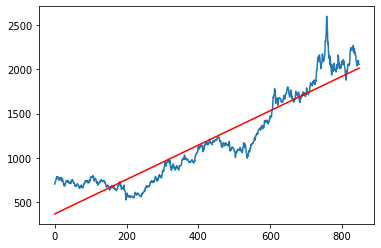

In [8]:
import statsmodels.api as sm
from statsmodels import regression
import matplotlib.pyplot as plt
def regress_y(y):
    y = y
    x = np.arange(0, len(y))
    x = sm.add_constant(x)
    # 使用OLS做拟合
    model = regression.linear_model.OLS(y, x).fit()
    return model
model = regress_y(y)
b = model.params[0]
k = model.params[1]
# y = kx + b
y_fit = k*x+b
plt.plot(x, y)
plt.plot(x, y_fit, 'r')
model.summary()

In [10]:
MAE = sum(np.abs(y-y_fit))/len(y)
MAE

152.24041265148912

In [11]:
MSE = sum(np.square(y-y_fit))/len(y)
MSE

34432.897686458025

In [12]:
from sklearn import metrics

MAE = metrics.mean_absolute_error(y, y_fit)
print(MAE)

152.2404126514891


In [13]:
MSE = metrics.mean_squared_error(y, y_fit)
MSE

34432.897686458055

In [14]:
RMSE = np.sqrt(metrics.mean_squared_error(y, y_fit))
RMSE

185.56103493583467

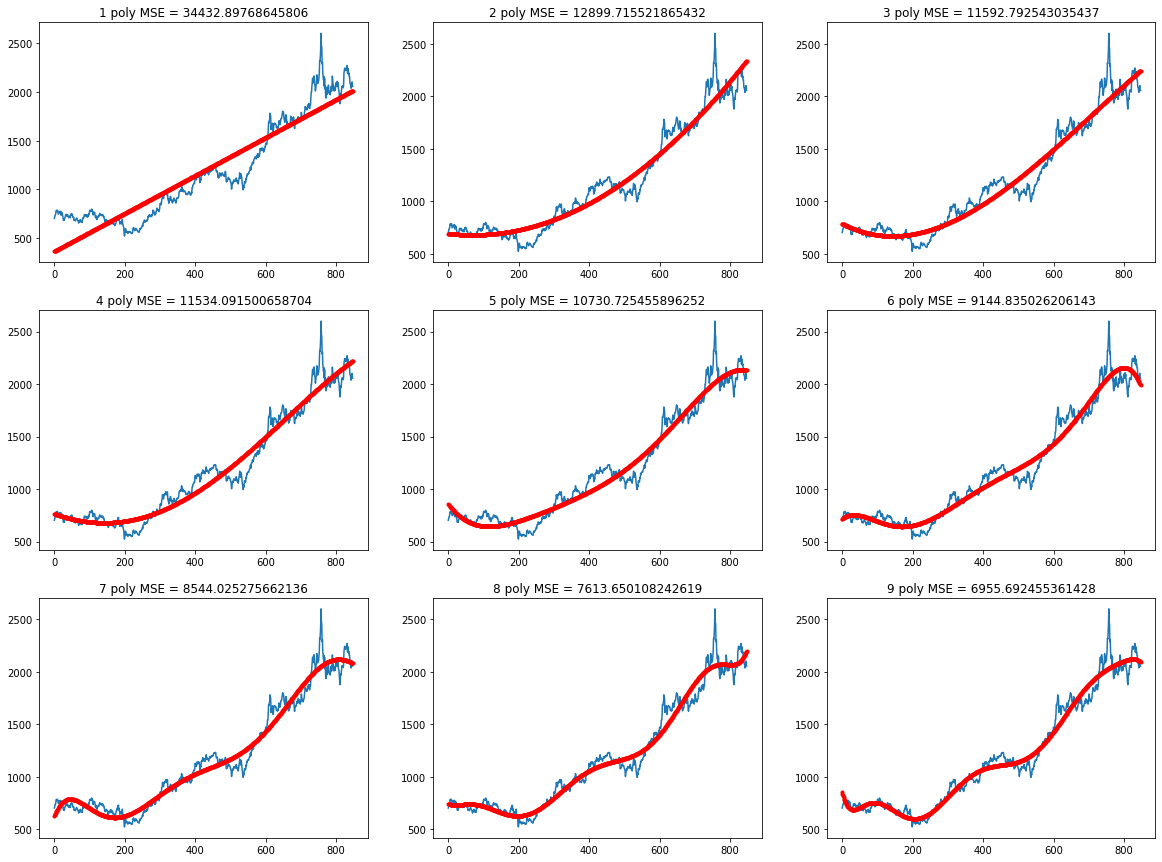

In [23]:
# 多项式回归
import itertools
# 生成9个subplots,3*3
_, axs = plt.subplots(nrows=3, ncols=3, figsize = (20, 15))
# 将383转换成一个线性list
axs_list = list(itertools.chain.from_iterable(axs))
# 1-9次多项式回归
poly = np.arange(1, 10, 1)
for p_cnt, ax in zip(poly, axs_list):
    # 使用polynomial.Chebyshev.fit函数进行多项式拟合
    p = np.polynomial.Chebyshev.fit(x, y, p_cnt)
    # 使用p直接对x序列带入即可得到拟合结果序列
    y_fit = p(x)
    # 度量mse
    mse = metrics.mean_squared_error(y, y_fit)
    # 使用拟合次数和误差大小设置标题
    ax.set_title('{0} poly MSE = {1}'.format(p_cnt, mse))
    ax.plot(x, y, '', x, y_fit, 'r.')

In [22]:
y

array([ 703.85,  715.86,  737.07,  738.36,  752.13,  782.52,  785.71,
        774.81,  788.42,  785.37,  772.94,  747.93,  750.74,  750.18,
        773.64,  773.78,  764.46,  769.16,  777.22,  736.32,  742.08,
        764.54,  757.73,  740.4 ,  718.23,  708.86,  683.43,  700.99,
        683.43,  697.48,  711.98,  718.45,  742.45,  742.48,  743.51,
        737.98,  725.62,  741.97,  736.41,  720.11,  718.26,  710.04,
        722.76,  728.2 ,  723.95,  710.35,  726.88,  746.47,  739.85,
        753.48,  747.73,  742.  ,  726.08,  711.06,  713.49,  714.74,
        682.05,  689.1 ,  683.62,  680.06,  677.91,  694.01,  698.3 ,
        708.02,  705.36,  694.2 ,  686.86,  681.38,  666.2 ,  655.64,
        679.96,  670.26,  674.01,  689.88,  690.97,  678.23,  662.53,
        667.83,  670.88,  662.87,  698.17,  708.83,  701.95,  714.19,
        718.02,  742.41,  743.06,  734.52,  727.38,  739.32,  734.82,
        739.57,  723.78,  715.4 ,  716.86,  740.4 ,  731.43,  725.87,
        751.13,  745